In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('AlgeriaExport.txt', header=None)
data.head()

,0
0,39.043173
1,46.244557
2,19.793873
3,24.684682
4,25.084059


In [15]:
data["Year"] = pd.RangeIndex(start=1960, stop=1960 + len(data))
data.set_index("Year", inplace=True)
data.columns = ["Export"]
data.head()

,Export
Year,
1960,39.043173
1961,46.244557
1962,19.793873
1963,24.684682
1964,25.084059


In [16]:
train_data = data.iloc[:45]
test_data = data.iloc[45:]

<Axes: xlabel='Year'>

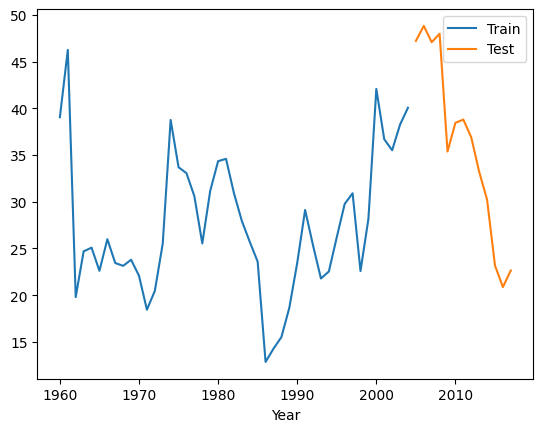

In [17]:
train_data["Export"].plot(legend=True, label="Train")
test_data["Export"].plot(legend=True, label="Test")


In [18]:
train_values = train_data["Export"].values
alpha = 0.7
l0 = train_values[0]
predicted_train_values = [l0]
for i in range(0, len(train_values - 1)):
    predicted_train_values.append(alpha * train_values[i] + (1 - alpha) * predicted_train_values[i])

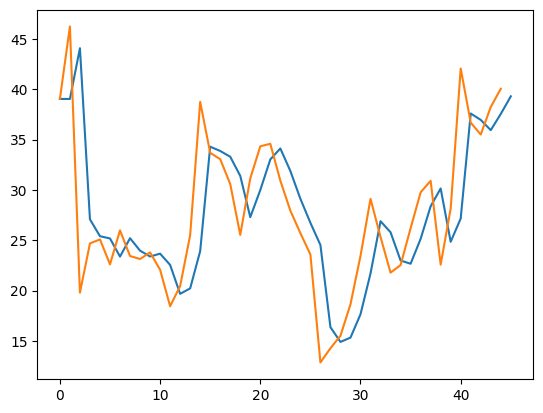

In [19]:
plt.plot(predicted_train_values)
plt.plot(train_values)

In [23]:
def ses(train_values, alpha, l0):
    predicted_train_values = [l0]
    for i in range(0, len(train_values)-1):
        predicted_train_values.append(alpha * train_values[i] + (1 - alpha) * predicted_train_values[i])
    return predicted_train_values

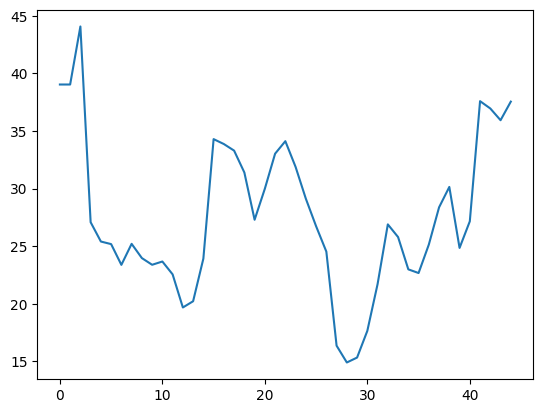

In [25]:
pdt = ses(train_values, 0.7, train_values[0])
plt.plot(pdt)

In [26]:
def sse(values, predictions):
    sum = 0
    for i in range(0, len(values)):
        sum += (values[i] - predictions[i]) ** 2
    return predicted_train_values

In [27]:
sse(train_values, predicted_train_values)

[39.043172595018,
 39.043172595018,
 44.084141600739244,
 27.08095335280577,
 25.403563443999502,
 25.179910142748472,
 23.376733532252395,
 25.203358322142087,
 23.96509923474103,
 23.3844739927734,
 23.667485974839288,
 22.551159172831536,
 19.67511115974732,
 20.217226736196256,
 23.917732121750955,
 34.29965016623625,
 33.87215040127534,
 33.29985386813012,
 31.40055301151604,
 27.2952516083485,
 29.992385626243667,
 33.03463871392568,
 34.12146715588817,
 31.88383957288052,
 29.124416150288518,
 26.734336172475423,
 24.529053873401004,
 16.35704629730976,
 14.89784619684805,
 15.324861374103325,
 17.64494274726489,
 21.704062382172435,
 26.893694234015733,
 25.791824265745312,
 22.98626117704007,
 22.66738602477869,
 25.136558992772734,
 28.37328152546111,
 30.146402423543485,
 24.848768533925774,
 27.15971210903169,
 37.59671645937777,
 36.96152826456025,
 35.94163165295033,
 37.556669870895135,
 39.3042595079133]

In [28]:
def ses_fit(train_values, dalpha):
    l0 = train_values[0]
    alpha_grid = np.arange(0, 1, dalpha)
    sse_list = []
    for alpha in alpha_grid:
        predicted_train_values = ses(train_values, alpha, l0)
        sse_list.append(sse(train_values, predicted_train_values))
        min_index = min(enumerate(sse_list), key=lambda x: x[1])[0]
        best_alpha = alpha_grid[min_index]
    return best_alpha

In [29]:
alpha = ses_fit(train_values, 0.01)
print(alpha)

0.0


In [30]:
def ses_predict(train_values, alpha, l0, h):
    predicted_train_values = ses(train_values, alpha, l0)
    one_step = alpha * train_values[-1] + (1 - alpha) * predicted_train_values[-1]
    h_steps = [one_step] * h
    return one_step, h_steps, predicted_train_values


In [31]:
one_step, h_steps, predicted_train_values = ses_predict(train_values, alpha, train_values[0], len(test_data))

In [32]:
h_steps

[39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018,
 39.043172595018]

In [33]:
train_data['Fit'] = pdt
train_data

C:\Users\omord\AppData\Local\Temp\ipykernel_28308\2375133570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fit'] = pdt


,Export,Fit
Year,,
1960,39.043173,39.043173
1961,46.244557,39.043173
1962,19.793873,44.084142
1963,24.684682,27.080953
1964,25.084059,25.403563
1965,22.603944,25.179910
1966,25.986198,23.376734
1967,23.434417,25.203358
1968,23.135635,23.965099


In [34]:
test_data['Predicted'] = h_steps
test_data

C:\Users\omord\AppData\Local\Temp\ipykernel_28308\1589830443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = h_steps


,Export,Predicted
Year,,
2005,47.205193,39.043173
2006,48.810688,39.043173
2007,47.068164,39.043173
2008,47.973345,39.043173
2009,35.371651,39.043173
2010,38.444548,39.043173
2011,38.786954,39.043173
2012,36.890548,39.043173
2013,33.209898,39.043173


<Axes: xlabel='Year'>

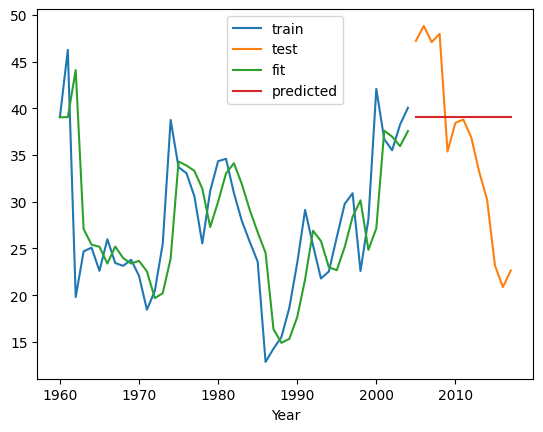

In [35]:
train_data["Export"].plot(legend= True, label= 'train')
test_data['Export'].plot(legend= True, label= 'test')
train_data['Fit'].plot(legend= True, label= 'fit')
test_data['Predicted'].plot(legend= True, label= 'predicted')

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

In [37]:
fit = SimpleExpSmoothing(train_data['Export'], initialization_method='estimated').fit()

C:\Users\omord\PycharmProjects\TSLab3\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
fcast = fit.forecast(len(test_data)).rename(r'$\alpha=%s$' % fit.model.params['smoothing_level'])

C:\Users\omord\PycharmProjects\TSLab3\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\omord\PycharmProjects\TSLab3\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [39]:
fcast

45    39.483456
46    39.483456
47    39.483456
48    39.483456
49    39.483456
50    39.483456
51    39.483456
52    39.483456
53    39.483456
54    39.483456
55    39.483456
56    39.483456
57    39.483456
Name: $\alpha=0.7596224854599761$, dtype: float64